In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [19]:
#We need to pass the iso-8859-1 encoding to deal with files
#with different formats and also date has to be in the int format not obj
# Thus we have parse the date 
data = pd.read_csv('amazon.csv', encoding= 'iso-8859-1', parse_dates=['date'])
data

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01


In [20]:
data.dtypes

year               int64
state             object
month             object
number           float64
date      datetime64[ns]
dtype: object

In [21]:
data.head(10)

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
5,2003,Acre,Janeiro,10.0,2003-01-01
6,2004,Acre,Janeiro,0.0,2004-01-01
7,2005,Acre,Janeiro,12.0,2005-01-01
8,2006,Acre,Janeiro,4.0,2006-01-01
9,2007,Acre,Janeiro,0.0,2007-01-01


In [22]:
data.tail(10)

,year,state,month,number,date
6444,2007,Tocantins,Dezembro,13.0,2007-01-01
6445,2008,Tocantins,Dezembro,7.0,2008-01-01
6446,2009,Tocantins,Dezembro,46.0,2009-01-01
6447,2010,Tocantins,Dezembro,72.0,2010-01-01
6448,2011,Tocantins,Dezembro,105.0,2011-01-01
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


In [23]:
print('There are:',data.shape[0], 'rows')
print('There are:', data.shape[1], 'columns')

There are: 6454 rows
There are: 5 columns


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    6454 non-null   int64         
 1   state   6454 non-null   object        
 2   month   6454 non-null   object        
 3   number  6454 non-null   float64       
 4   date    6454 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 252.2+ KB


## Check For Duplicate Data

In [29]:
print('Is there any duplicated data?',data.duplicated().any())


Is there any duplicated data? True


In [30]:
data = data.drop_duplicates()

In [31]:
data.duplicated().any()

False

In [32]:
#new matrix value
data.shape

(6422, 5)

## Check Null Values In The Dataset

In [34]:
data.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

<AxesSubplot:>

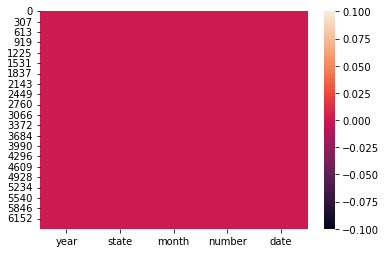

In [36]:
sns.heatmap(data.isnull())

## Get Overall Statistics About The Dataframe

In [37]:
data.describe()

,year,number
count,6422.000000,6422.000000
mean,2007.490969,108.815178
std,5.731806,191.142482
min,1998.000000,0.000000
25%,2003.000000,3.000000
50%,2007.000000,24.497000
75%,2012.000000,114.000000
max,2017.000000,998.000000


## Rename Month Names To English

In [41]:
data.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [42]:
data['month_new'] = data['month'].map({'Janeiro': 'jan',
                                      'Fevereiro': 'feb',
                                      'Marco': 'march',
                                      'Abril': 'april',
                                      'Maio': 'may',
                                      'Junho': 'jun',
                                      'Julho': 'july',
                                      'Agosto': 'august',
                                      'Setembro': 'sep',
                                      'Outubro': 'oct',
                                      'Novembro': 'nov',
                                      'Dezembro': 'dec'})

/var/folders/wd/j33rr06x12l5wdk4bpmmwf6r0000gn/T/ipykernel_2530/371902948.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['month_new'] = data['month'].map({'Janeiro': 'jan',


In [44]:
data.head()

,year,state,month,number,date,month_new
0,1998,Acre,Janeiro,0.0,1998-01-01,jan
1,1999,Acre,Janeiro,0.0,1999-01-01,jan
2,2000,Acre,Janeiro,0.0,2000-01-01,jan
3,2001,Acre,Janeiro,0.0,2001-01-01,jan
4,2002,Acre,Janeiro,0.0,2002-01-01,jan


## Total Number of Fires Registered

In [57]:
data.shape
#6422 fires were registered

(6422, 6)

## In Which Month The Total Number of Forest Fires Were Reported Where greater?

In [58]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [77]:
data_1 = data.groupby('month_new')['number'].sum().reset_index()
data_1

,month_new,number
0,april,28184.770
1,august,88050.435
2,dec,57535.480
3,feb,30839.050
4,jan,47681.844
5,july,92319.113
6,jun,55997.675
7,may,34725.363
8,nov,85508.054
9,oct,88681.579


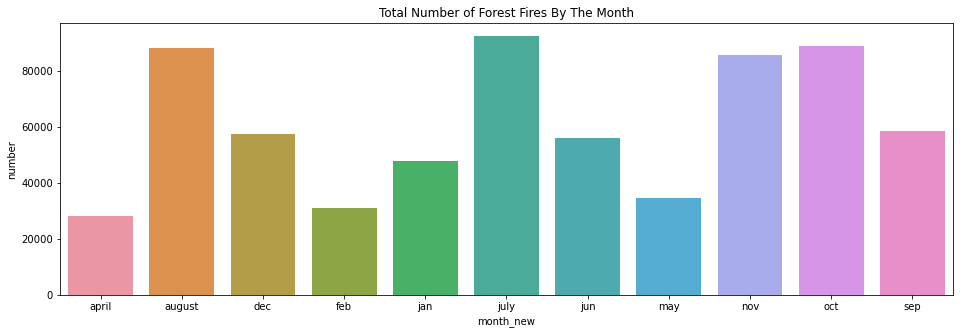

In [88]:
plt.figure(figsize=(16,5))
sns.barplot(x= 'month_new', y= 'number', data= data_1)
plt.title('Total Number of Forest Fires By The Month')
plt.show()

It's July

## In Which Year Maximum Number of Forest Fires Was Reported?

In [87]:
data_2 = data.groupby('year')['number'].sum().reset_index()
data_2

,year,number
0,1998,20013.971
1,1999,26882.821
2,2000,27351.251
3,2001,29054.612
4,2002,37390.600
5,2003,42760.674
6,2004,38450.163
7,2005,35004.965
8,2006,33824.161
9,2007,33028.413


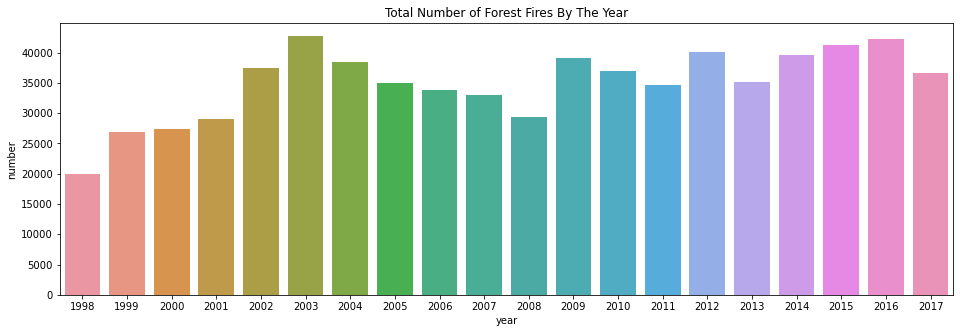

In [89]:
plt.figure(figsize=(16,5))
sns.barplot(x= 'year', y= 'number', data= data_2)
plt.title('Total Number of Forest Fires By The Year')
plt.show()

In the year of 2003

## In Which State Maximum Number of Forest Fires Was Reported?

In [93]:
data_3 =data.groupby('state')['number'].sum().reset_index()
data_3

,state,number
0,Acre,18464.030
1,Alagoas,4606.000
2,Amapa,21831.576
3,Amazonas,30650.129
4,Bahia,44746.226
5,Ceara,30428.063
6,Distrito Federal,3561.000
7,Espirito Santo,6546.000
8,Goias,37695.520
9,Maranhao,25129.131


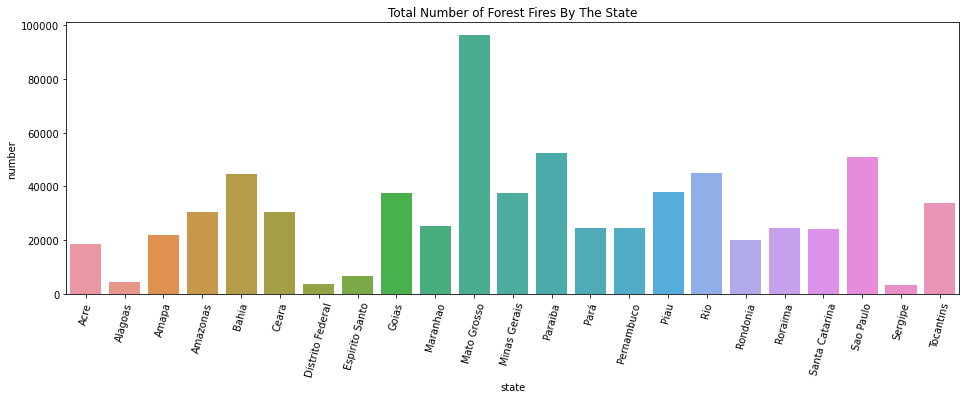

In [97]:
plt.figure(figsize=(16,5))
sns.barplot(x= 'state', y= 'number', data= data_3)
plt.title('Total Number of Forest Fires By The State')
plt.xticks(rotation=75)
plt.show()

The state of Mato Grosso

## Find Total Number of Fires Were Reported In Amazonas

In [103]:
data[data['state']== 'Amazonas']['number'].sum()

30650.129

## Display Number of Fires Were Reported In Amazonas (Year-Wise)

In [114]:
data_4 = data[data['state']=='Amazonas']
data_5 = data_4.groupby('year')['number'].sum().reset_index()
data_5

,year,number
0,1998,946.000
1,1999,1061.000
2,2000,853.000
3,2001,1297.000
4,2002,2852.000
5,2003,1524.268
6,2004,2298.207
7,2005,1657.128
8,2006,997.640
9,2007,589.601


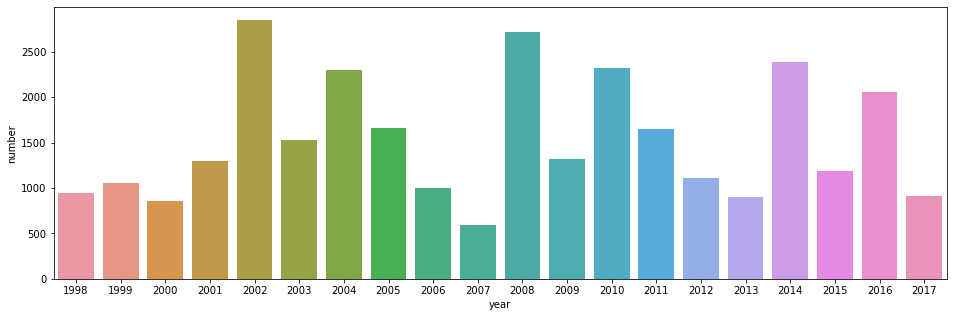

In [117]:
plt.figure(figsize=(16,5))
sns.barplot(x= 'year', y = 'number', data = data_5)
plt.show()

## Display Number of Fires Were Reported In Amazonas (Day-Wise)

In [121]:
data_6 = data[data['state']=='Amazonas']
data_6


,year,state,month,number,date,month_new
718,1998,Amazonas,Janeiro,0.0,1998-01-01,jan
719,1999,Amazonas,Janeiro,3.0,1999-01-01,jan
720,2000,Amazonas,Janeiro,7.0,2000-01-01,jan
721,2001,Amazonas,Janeiro,3.0,2001-01-01,jan
722,2002,Amazonas,Janeiro,17.0,2002-01-01,jan
...,...,...,...,...,...,...
952,2012,Amazonas,Dezembro,80.0,2012-01-01,dec
953,2013,Amazonas,Dezembro,236.0,2013-01-01,dec
954,2014,Amazonas,Dezembro,293.0,2014-01-01,dec
955,2015,Amazonas,Dezembro,565.0,2015-01-01,dec


In [129]:
day= data_6.groupby(data_6['date'].dt.dayofweek).sum().number

import calendar 

day.index = [calendar.day_name[x] for x in range(0,7)]
day = day.reset_index()

In [130]:
day

,index,number
0,Monday,1886.601
1,Tuesday,6474.217
2,Wednesday,3910.177
3,Thursday,5754.802
4,Friday,5446.480
5,Saturday,4162.666
6,Sunday,3015.186


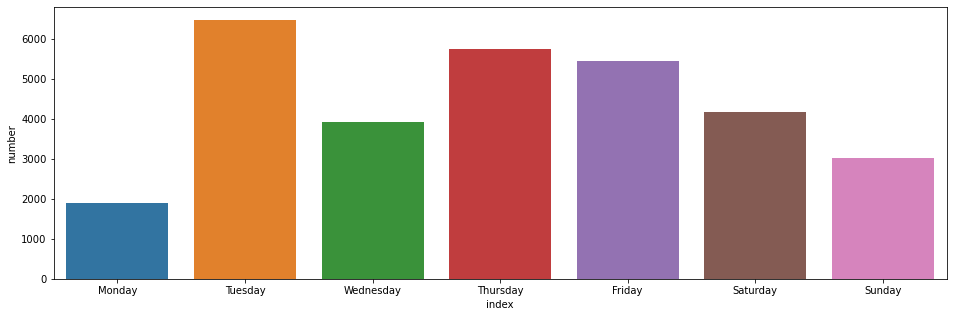

In [133]:
plt.figure(figsize=(16,5))
sns.barplot(x='index', y='number', data = day)
plt.show()

## Find Total Number of Fires  Were Reported In 2015 And Visualize Data Based on Each ‘Month’

In [148]:
data_7 = data[data['year']== 2015].groupby('month_new')['number'].sum().reset_index()

In [149]:
data_7

,month_new,number
0,april,2573.000
1,august,4363.125
2,dec,4088.522
3,feb,2309.000
4,jan,4635.000
5,july,4364.392
6,jun,3260.552
7,may,2384.000
8,nov,4034.518
9,oct,4499.525


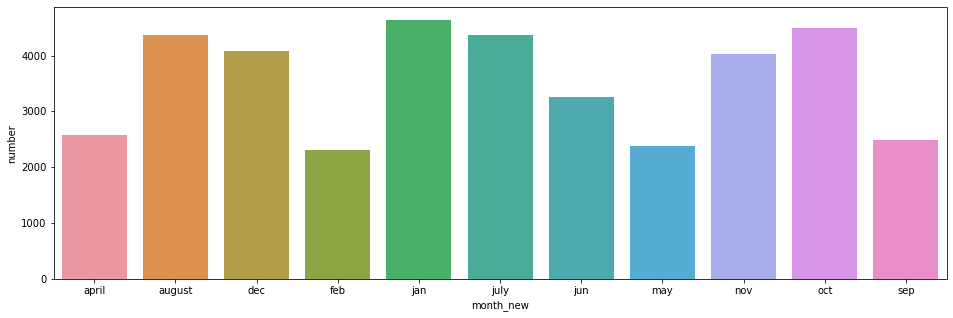

In [151]:
plt.figure(figsize=(16,5))
sns.barplot(x= 'month_new', y='number', data = data_7)
plt.show()

## Find Average Number of Fires Were Reported From Highest to Lowest (State-Wise)

In [156]:
data_8 = data.groupby('state')['number'].mean().sort_values(ascending=False).reset_index()
data_8

,state,number
0,Sao Paulo,213.896226
1,Mato Grosso,203.479975
2,Bahia,187.222703
3,Piau,158.174674
4,Goias,157.721841
5,Minas Gerais,156.800243
6,Tocantins,141.037176
7,Amazonas,128.243218
8,Ceara,127.314071
9,Paraiba,111.073979


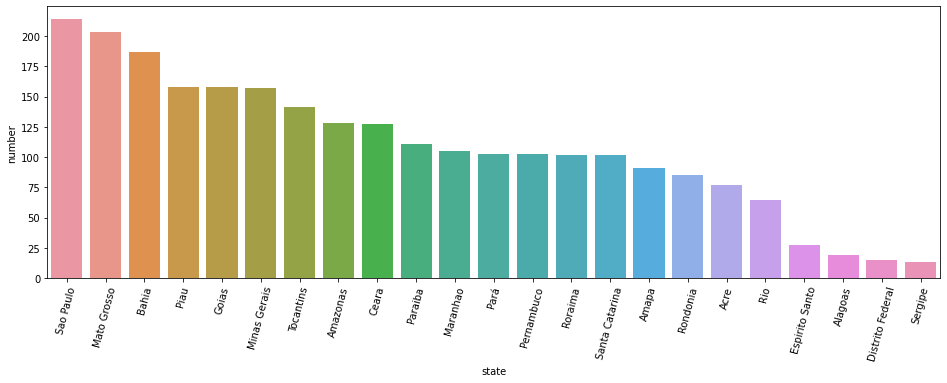

In [158]:
plt.figure(figsize=(16,5))
sns.barplot(x = 'state', y='number', data = data_8)
plt.xticks(rotation=75)
plt.show()

## Find The State Names Where Fires Were Reported In 'dec' Month

In [161]:
data_9 = data[data['month_new']== 'dec']
data_9

,year,state,month,number,date,month_new
220,1998,Acre,Dezembro,7.0,1998-01-01,dec
221,1999,Acre,Dezembro,0.0,1999-01-01,dec
222,2000,Acre,Dezembro,0.0,2000-01-01,dec
223,2001,Acre,Dezembro,0.0,2001-01-01,dec
224,2002,Acre,Dezembro,1.0,2002-01-01,dec
...,...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,2012-01-01,dec
6450,2013,Tocantins,Dezembro,85.0,2013-01-01,dec
6451,2014,Tocantins,Dezembro,223.0,2014-01-01,dec
6452,2015,Tocantins,Dezembro,373.0,2015-01-01,dec


In [165]:
dec_data_state =data_9.groupby('state')['number'].sum().reset_index()

dec_data_state

,state,number
0,Acre,47.000
1,Alagoas,964.000
2,Amapa,4504.000
3,Amazonas,2224.000
4,Bahia,4559.408
5,Ceara,5251.183
6,Distrito Federal,5.000
7,Espirito Santo,239.000
8,Goias,1007.000
9,Maranhao,833.685


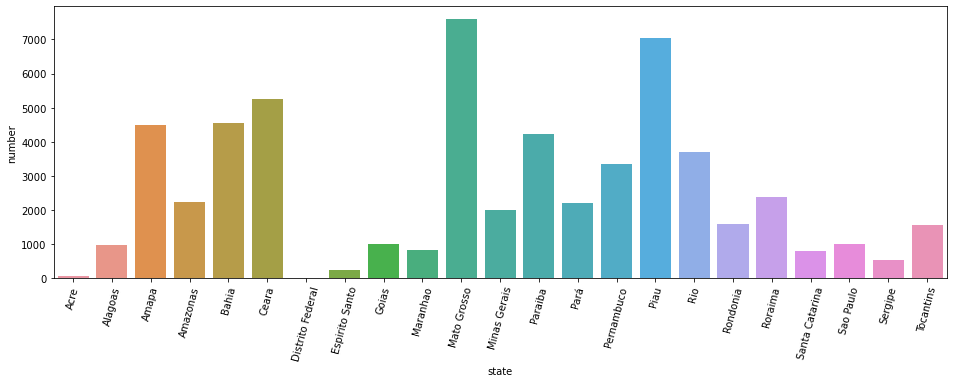

In [168]:
plt.figure(figsize=(16,5))
sns.barplot(x='state', y='number', data = dec_data_state)
plt.xticks(rotation=75)
plt.show()